# **LIBRARIES IMPORT**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import sequential

# **SETTINGS & CONFIG**

In [2]:
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 8)
plt.rcParams['figure.figsize'] = (12, 6)

# **DATA LOADING**

In [8]:
df = pd.read_csv("/content/FoodDelivery_Saudi_2022-2025.csv")

In [9]:
df.head()

,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars)
0,203,1/18/2025 12:17,Jeddah,Sweets,252.73,15,3
1,204,5/12/2023 19:40,Buraidah,Barbecue,535.70,7,4
2,205,5/10/2023 7:47,Hail,Coffee,395.11,14,4
3,206,4/3/2023 23:39,Abha,Fast Food,698.11,5,5
4,207,12/21/2024 13:30,Buraidah,Coffee,499.87,8,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Order Number                         9711 non-null   int64         
 1   Order Date and Time                  9711 non-null   datetime64[ns]
 2   Order_City                           9711 non-null   object        
 3   Restaurant Type                      9711 non-null   object        
 4   Total Bill (in Saudi Riyals)         9711 non-null   float64       
 5   Delivery Duration (in minutes)       9711 non-null   int64         
 6   Customer Rating (from 1 to 5 stars)  9711 non-null   int64         
 7   Order Year                           9711 non-null   int32         
 8   Order Month                          9711 non-null   object        
 9   Month_Year                           9711 non-null   object        
dtypes: datetime64[ns]

# **DATA CLEANING**

In [22]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Order Year'] = df['Order Date and Time'].dt.year
df['Order Month'] = df['Order Date and Time'].dt.month_name()
df['Month_Year'] = df['Order Date and Time'].dt.strftime('%b %Y')
df = df[df['Order Year'].between (2022, 2024)]
df['Time_of_Day'] = df['Order Date and Time'].dt.strftime('%p') #AM/PM

# **CORELATION OF DATA**

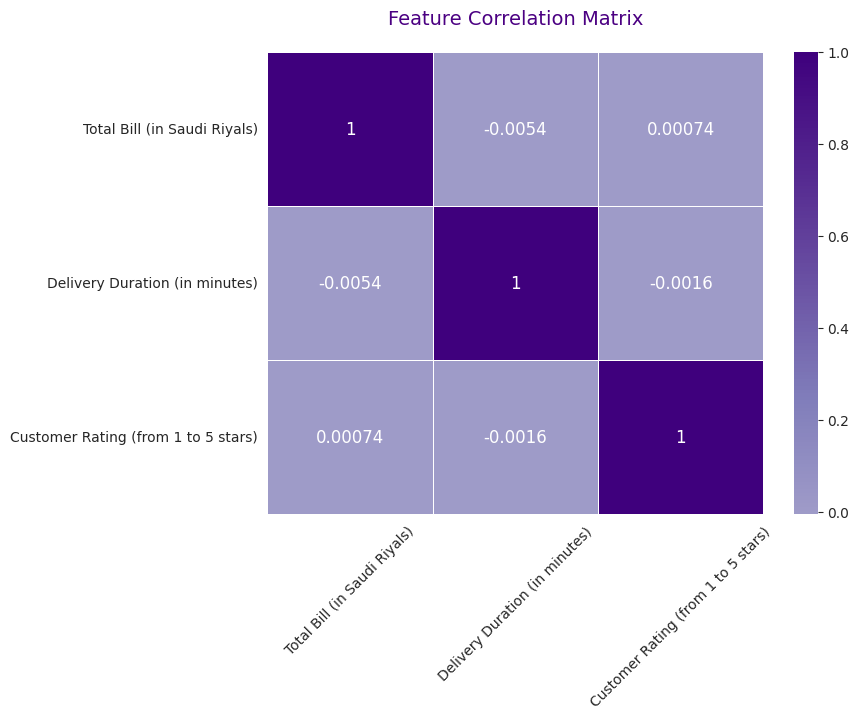

In [11]:
corr_matrix = df[['Total Bill (in Saudi Riyals)',
                 'Delivery Duration (in minutes)',
                 'Customer Rating (from 1 to 5 stars)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Purples',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 12}
)
plt.title("Feature Correlation Matrix", pad=20, fontsize=14, color='#4b0082')
plt.xticks(rotation=45)
plt.show()

# **CHAPTER 1: THE BIG PICTURE**

In [14]:
# 1.1 Key Metrics Card
total_revenue = df['Total Bill (in Saudi Riyals)'].sum()/1e6
avg_rating = df['Customer Rating (from 1 to 5 stars)'].mean()
avg_delivery = df['Delivery Duration (in minutes)'].median()

print(f"""
• Total Revenue: {total_revenue:.2f} Million SAR
• Average Rating: {avg_rating:.1f}/5 stars
• Median Delivery Time: {avg_delivery} minutes
""")


• Total Revenue: 4.24 Million SAR
• Average Rating: 3.0/5 stars 
• Median Delivery Time: 12.0 minutes



In [17]:
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    '<b style="color:#4b0082">Total Bill Distribution</b>',
    '<b style="color:#4b0082">Delivery Duration Distribution</b>'
))

fig.add_trace(
    go.Histogram(
        x=df['Total Bill (in Saudi Riyals)'],
        marker_color='#9370db',
        opacity=0.9,
        name='Total Bill',
        nbinsx=30
    ), row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df['Delivery Duration (in minutes)'],
        marker_color='#6a0dad',
        opacity=0.9,
        name='Delivery Duration',
        nbinsx=20
    ), row=1, col=2
)

fig.update_layout(
    title_text="<b>Key Metric Distributions</b>",
    showlegend=False,
    bargap=0.05,
    template='plotly_white',
    font=dict(color='#4b0082') )
fig.show()

In [18]:
city_counts = df['Order_City'].value_counts().reset_index()
fig = px.pie(
    city_counts,
    names='Order_City',
    values='count',
    color_discrete_sequence=px.colors.sequential.Purples_r,
    hole=0.4,
    title='<b style="color:#4b0082">Order Distribution by City</b>'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    marker=dict(line=dict(color='white', width=2)),
    rotation=90
)
fig.update_layout(
    uniformtext_minsize=12,
    plot_bgcolor='rgba(245,240,255,0.9)'
)
fig.show()

# **CHAPTER 2: WHEN DO CUSTOMERS ORDER?**

/tmp/ipython-input-57-1428527914.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




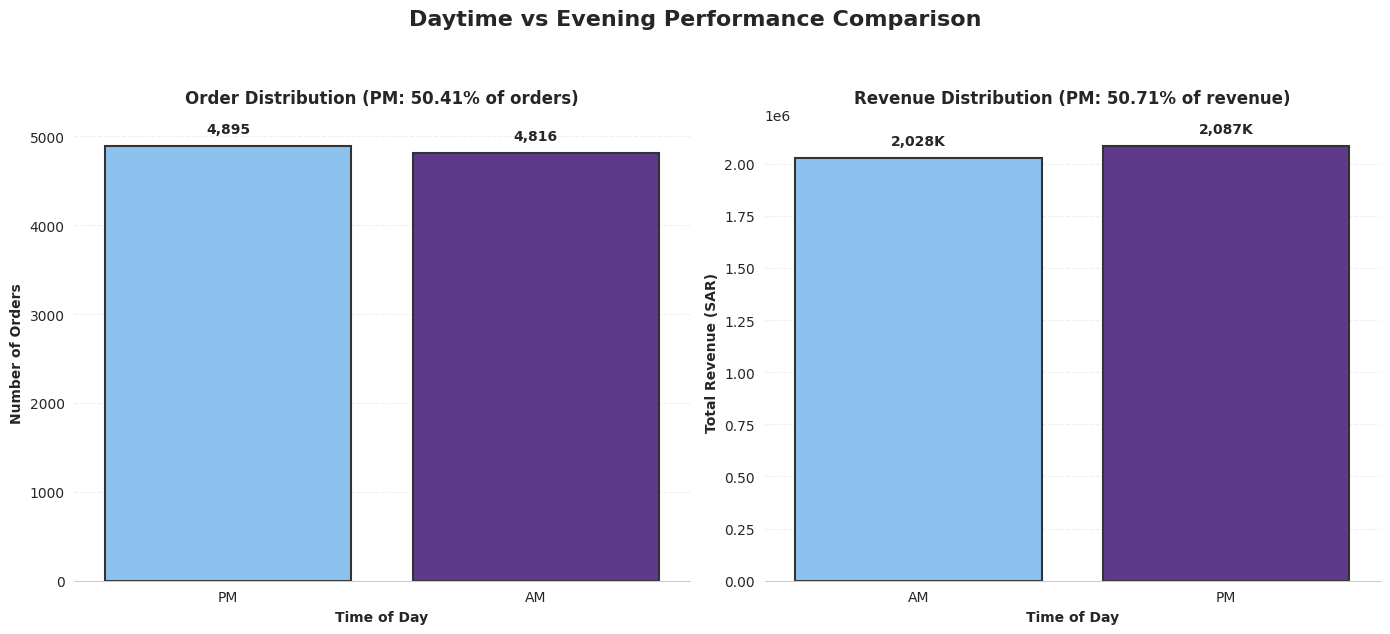

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and colors
sns.set_style("whitegrid")
light_blue = "#7DC4FF"  # For AM
dark_purple = "#5E2B97"  # For PM

plt.figure(figsize=(14, 6))
plt.suptitle("Daytime vs Evening Performance Comparison", y=1.05, fontsize=16, fontweight='bold')

# 1. Order Count Comparison (Left)
ax1 = plt.subplot(1, 2, 1)
order_counts = df['Time_of_Day'].value_counts()
pm_order_share = order_counts['PM']/order_counts.sum()*100

sns.barplot(x=order_counts.index, y=order_counts.values,
            palette=[light_blue, dark_purple],
            edgecolor=".2", linewidth=1.5)
plt.title(f'Order Distribution (PM: {pm_order_share:.2f}% of orders)',
          pad=15, fontweight='semibold')
plt.ylabel('Number of Orders', fontweight='semibold')
plt.xlabel('Time of Day', fontweight='semibold')

# Add value labels
for i, count in enumerate(order_counts.values):
    ax1.text(i, count + max(order_counts)*0.03,
             f'{count:,}',
             ha='center',
             fontweight='bold')

# 2. Revenue Comparison (Right)
ax2 = plt.subplot(1, 2, 2)
revenue = df.groupby('Time_of_Day')['Total Bill (in Saudi Riyals)'].sum()
pm_rev_share = revenue['PM']/revenue.sum()*100

sns.barplot(x=revenue.index, y=revenue.values,
            palette=[light_blue, dark_purple],
            edgecolor=".2", linewidth=1.5)
plt.title(f'Revenue Distribution (PM: {pm_rev_share:.2f}% of revenue)',
          pad=15, fontweight='semibold')
plt.ylabel('Total Revenue (SAR)', fontweight='semibold')
plt.xlabel('Time of Day', fontweight='semibold')

# Add value labels in thousands
for i, rev in enumerate(revenue.values):
    ax2.text(i, rev + max(revenue)*0.03,
             f'{rev/1000:,.0f}K',
             ha='center',
             fontweight='bold')

# Styling
for ax in [ax1, ax2]:
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    sns.despine(left=True)

plt.tight_layout()
plt.show()

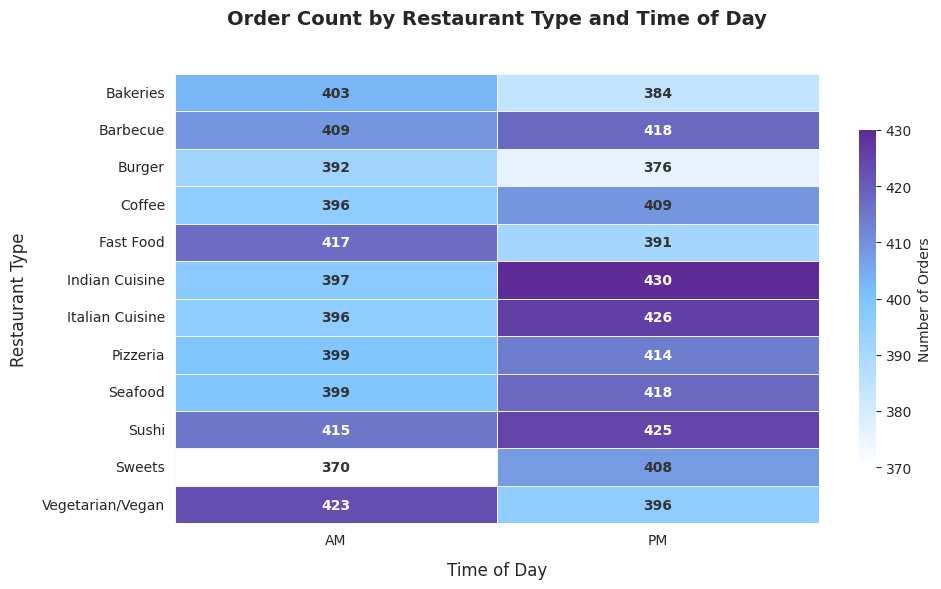

In [53]:


# Create sample data matching your image
data = {
    'Bakeries': [403, 384],
    'Barbecue': [409, 418],
    'Burger': [392, 376],
    'Coffee': [396, 409],
    'Fast Food': [417, 391],
    'Indian Cuisine': [397, 430],
    'Italian Cuisine': [396, 426],
    'Pizzeria': [399, 414],
    'Seafood': [399, 418],
    'Sushi': [415, 425],
    'Sweets': [370, 408],
    'Vegetarian/Vegan': [423, 396]
}

restaurant_time = pd.DataFrame(data, index=['AM', 'PM']).T

# Create custom white-blue-purple gradient
colors = ["#FFFFFF", "#7DC4FF", "#5E2B97"]  # White -> Light Blue -> Dark Purple
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Create heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    restaurant_time,
    annot=True,
    fmt='d',
    cmap=cmap,
    linewidths=0.5,
    linecolor='#f5f5f5',
    cbar_kws={
        'label': 'Number of Orders',
        'shrink': 0.75
    },
    annot_kws={
        'fontsize': 10,
        'fontweight': 'bold'
    }
)

# Smart text coloring (white for dark cells)
for t in heatmap.texts:
    t.set_color('white' if float(t.get_text()) > 410 else '#333333')

# Formatting
plt.title('Order Count by Restaurant Type and Time of Day\n',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12, labelpad=10)
plt.ylabel('Restaurant Type', fontsize=12, labelpad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# **CHAPTER 3: GEOGRAPHIC PERFORMANCE**

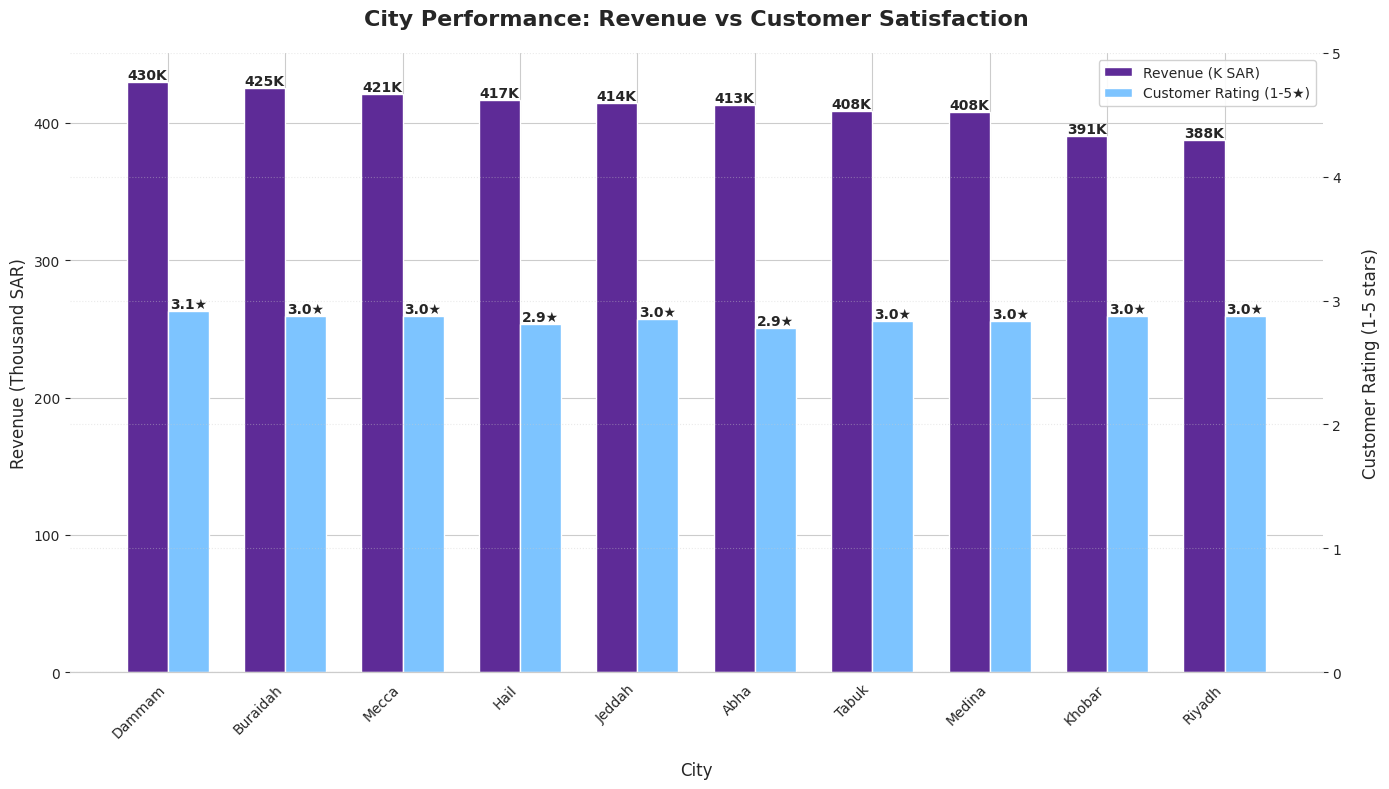

In [33]:
# Prepare data - convert revenue to thousands
city_stats = df.groupby('Order_City').agg({
    'Total Bill (in Saudi Riyals)': 'sum',
    'Customer Rating (from 1 to 5 stars)': 'mean'
}).sort_values('Total Bill (in Saudi Riyals)', ascending=False)

# Convert to thousands
city_stats['Revenue (K SAR)'] = city_stats['Total Bill (in Saudi Riyals)'] / 1000

# Scale rating to match revenue range for visualization
max_rev_k = city_stats['Revenue (K SAR)'].max()
city_stats['Rating Scaled'] = city_stats['Customer Rating (from 1 to 5 stars)'] * (max_rev_k / 5)

plt.figure(figsize=(14, 8))

# Set positions and width
x = np.arange(len(city_stats))
width = 0.35

# Create bars
bars_rev = plt.bar(x - width/2, city_stats['Revenue (K SAR)'],
                  width, label='Revenue (K SAR)',
                  color='#5E2B97', edgecolor='white', linewidth=1)
bars_rating = plt.bar(x + width/2, city_stats['Rating Scaled'],
                     width, label='Customer Rating (1-5★)',
                     color='#7DC4FF', edgecolor='white', linewidth=1)

# Add value labels
def add_labels(bars, is_rating=False):
    for bar in bars:
        height = bar.get_height()
        if is_rating:
            # Convert back to original rating
            value = round(height * 5 / max_rev_k, 1)
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{value}★', ha='center', va='bottom',
                    fontsize=10, fontweight='bold')
        else:
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height:,.0f}K', ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

add_labels(bars_rev)
add_labels(bars_rating, is_rating=True)

# Customize the plot
plt.title('City Performance: Revenue vs Customer Satisfaction',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('City', fontsize=12, labelpad=15)
plt.ylabel('Revenue (Thousand SAR)', fontsize=12)
plt.xticks(x, city_stats.index, rotation=45, ha='right')
plt.legend(loc='upper right', framealpha=0.9)

# Add twin axis for actual rating scale
ax2 = plt.gca().twinx()
ax2.set_ylim(0, 5)
ax2.set_ylabel('Customer Rating (1-5 stars)', fontsize=12, labelpad=15)

# Add horizontal grid
plt.grid(axis='y', linestyle=':', alpha=0.4)
sns.despine(left=True, right=True)

plt.tight_layout()
plt.show()

# **CHAPTER 4: RESTAURANT STRATEGY**

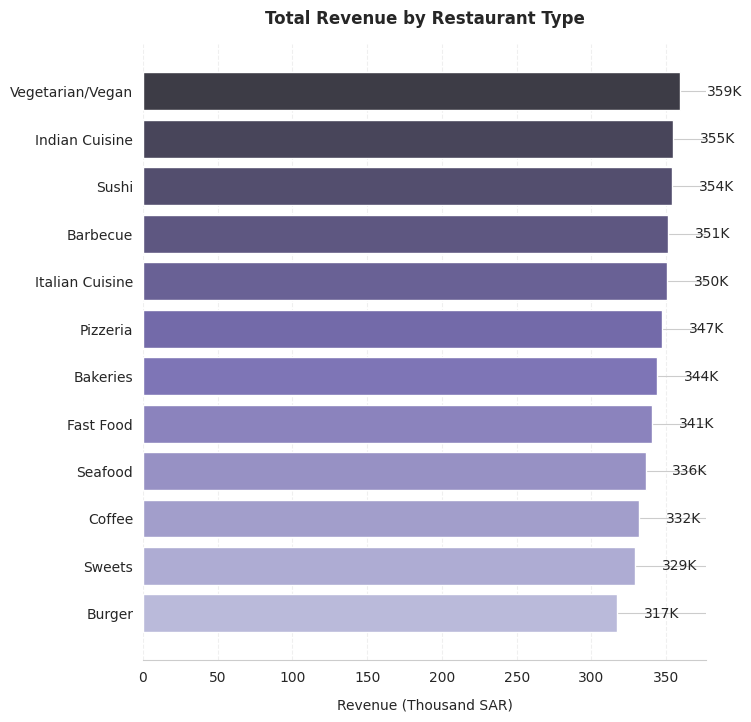

In [35]:
# Prepare data - convert revenue to thousands
restaurant_perf = df.groupby('Restaurant Type').agg({
    'Total Bill (in Saudi Riyals)': ['sum', 'median', 'count'],
    'Customer Rating (from 1 to 5 stars)': 'mean'
}).sort_values(('Total Bill (in Saudi Riyals)', 'sum'), ascending=True)  # Sort for horizontal bars

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

# Create gradient purple palette
n_types = len(restaurant_perf)
purple_palette = sns.color_palette("Purples_d", n_types)

bars = plt.barh(
    restaurant_perf.index,
    restaurant_perf[('Total Bill (in Saudi Riyals)', 'sum')]/1e3,  # Convert to thousands
    color=purple_palette,
    edgecolor='white',
    linewidth=1
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(restaurant_perf[('Total Bill (in Saudi Riyals)', 'sum')]/1e3)*0.05,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}K',
             va='center',
             fontsize=10)

plt.title('Total Revenue by Restaurant Type', pad=15, fontweight='bold')
plt.xlabel('Revenue (Thousand SAR)', labelpad=10)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True)

# **CHAPTER 5: TRENDS OVER TIME**

/tmp/ipython-input-44-841321795.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



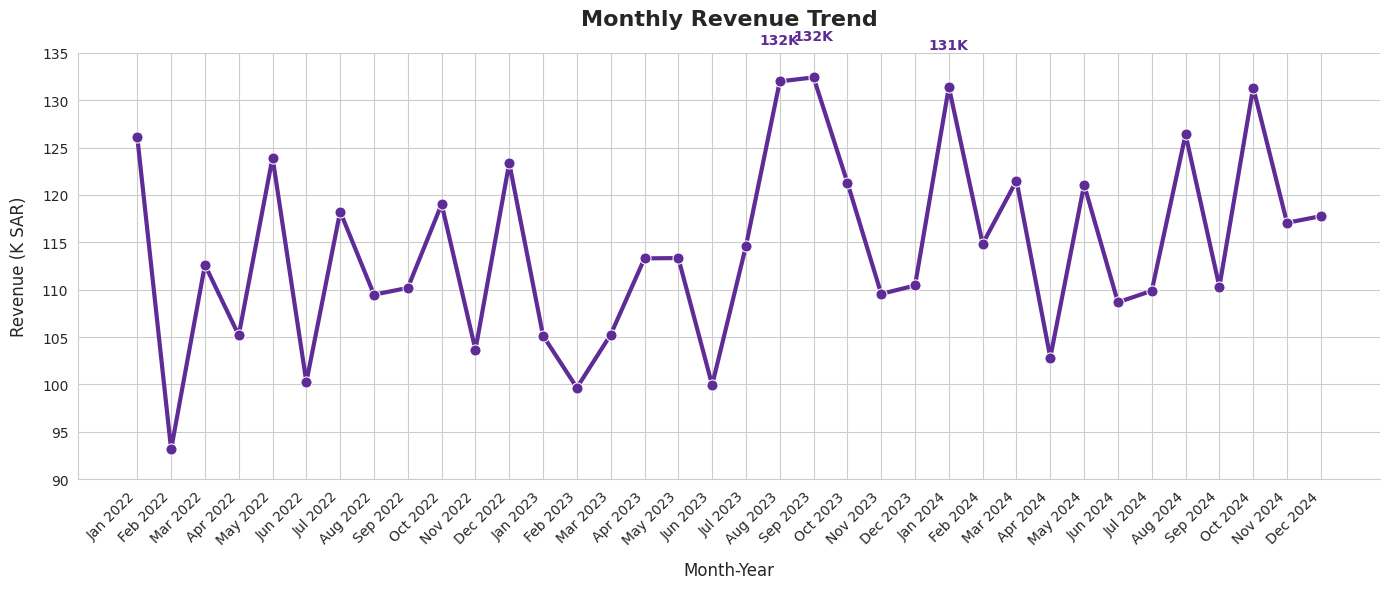

In [44]:


monthly_revenue = df.groupby(['Order Year', 'Order Month', 'Month_Year'])['Total Bill (in Saudi Riyals)'].sum().reset_index()
monthly_revenue['Revenue (K SAR)'] = monthly_revenue['Total Bill (in Saudi Riyals)'] / 1e3  # Convert to thousands

# 2. Ensure proper month ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['Order Month'] = pd.Categorical(monthly_revenue['Order Month'],
                                              categories=month_order,
                                              ordered=True)

# Create a proper datetime column for sorting
monthly_revenue['Sort_Date'] = pd.to_datetime(monthly_revenue['Order Year'].astype(str) + '-' +
                                             monthly_revenue['Order Month'].astype(str))

# Sort chronologically
monthly_revenue = monthly_revenue.sort_values('Sort_Date')

# 3. Create the visualization
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot line with markers
line = sns.lineplot(
    x='Month_Year',
    y='Revenue (K SAR)',
    data=monthly_revenue,
    color='#5E2B97',
    marker='o',
    markersize=8,
    linewidth=3,
    sort=False  # Important: prevent automatic sorting
)

# 4. Customize the chart
plt.title('Monthly Revenue Trend', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12, labelpad=10)
plt.ylabel('Revenue (K SAR)', fontsize=12, labelpad=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Highlight top 3 months with values in thousands
top_months = monthly_revenue.nlargest(3, 'Revenue (K SAR)')
for idx, row in top_months.iterrows():
    position = list(monthly_revenue['Month_Year']).index(row['Month_Year'])
    plt.text(position,
             row['Revenue (K SAR)'] + max(monthly_revenue['Revenue (K SAR)'])*0.03,
             f'{row["Revenue (K SAR)"]:,.0f}K',
             ha='center',
             color='#5E2B97',
             fontweight='bold')

# Adjust y-axis to show clean thousands
max_rev_k = max(monthly_revenue['Revenue (K SAR)'])
yticks = [tick for tick in plt.yticks()[0] if tick >= 0]
plt.yticks(yticks, [f'{int(y/1000)}K' if y >= 1000 else str(int(y)) for y in yticks])

# Adjust layout
plt.tight_layout()
sns.despine()
plt.show()